<a href="https://www.kaggle.com/code/itsnahm/grocery-sales-analysis?scriptVersionId=127691534" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/grocery-sales-2019/grocery sales 2.csv


# Dataset Identification

In [2]:
df = pd.read_csv("/kaggle/input/grocery-sales-2019/grocery sales 2.csv")

In [3]:
df

,order_id,customer_id,category,sub_category,city,order_date,region,sales_in_usd,profit_in_usd
0,OD1,Harish,Oil & Masala,Masalas,Salem,9/1/2022,North,1254.0,401.28
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,28/06/2022,South,749.0,149.80
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,3/2/2022,West,2360.0,165.20
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,21/04/2022,South,896.0,89.60
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,22/03/2022,South,2355.0,918.45
...,...,...,...,...,...,...,...,...,...
494,OD495,Veronica,Beverages,Health Drinks,Pudukottai,8/2/2022,South,1373.0,247.14
495,OD496,Ridhesh,Beverages,Soft Drinks,Krishnagiri,10/3/2022,South,1598.0,415.48
496,OD497,Komal,Food Grains,Atta & Flour,Karur,27/01/2022,West,1398.0,545.22
497,OD498,Hussain,Beverages,Health Drinks,Cumbum,9/5/2022,West,1070.0,53.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       499 non-null    object 
 1   customer_id    499 non-null    object 
 2   category       499 non-null    object 
 3   sub_category   428 non-null    object 
 4   city           428 non-null    object 
 5   order_date     428 non-null    object 
 6   region         428 non-null    object 
 7   sales_in_usd   428 non-null    float64
 8   profit_in_usd  428 non-null    float64
dtypes: float64(2), object(7)
memory usage: 35.2+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

order_id          0
customer_id       0
category          0
sub_category     71
city             71
order_date       71
region           71
sales_in_usd     71
profit_in_usd    71
dtype: int64

There are nan values in columns

In [7]:
df.nunique()

order_id         499
customer_id       50
category           7
sub_category      19
city              24
order_date       164
region             5
sales_in_usd     393
profit_in_usd    427
dtype: int64

In [8]:
df.category.unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs'], dtype=object)

# Data Cleaning

In [9]:
df[df.category=='Eggs']

,order_id,customer_id,category,sub_category,city,order_date,region,sales_in_usd,profit_in_usd
11,OD12,Yadav,Eggs,NaN,NaN,NaN,NaN,NaN,NaN
14,OD15,Sundar,Eggs,NaN,NaN,NaN,NaN,NaN,NaN
18,OD19,Haseena,Eggs,NaN,NaN,NaN,NaN,NaN,NaN
24,OD25,Sharon,Eggs,NaN,NaN,NaN,NaN,NaN,NaN
35,OD36,Sabeela,Eggs,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
458,OD459,Muneer,Eggs,NaN,NaN,NaN,NaN,NaN,NaN
461,OD462,Ramesh,Eggs,NaN,NaN,NaN,NaN,NaN,NaN
472,OD473,Amrish,Eggs,NaN,NaN,NaN,NaN,NaN,NaN
474,OD475,Esther,Eggs,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#delete duplicated rows
df2 = df[df.category != 'Eggs']

In [11]:
df2.isna().sum()

order_id         0
customer_id      0
category         0
sub_category     0
city             0
order_date       0
region           0
sales_in_usd     0
profit_in_usd    0
dtype: int64

In [12]:
df2.nunique()

order_id         428
customer_id       50
category           6
sub_category      19
city              24
order_date       164
region             5
sales_in_usd     393
profit_in_usd    427
dtype: int64

In [13]:
#delete order_id because has too much unique values
del df2['order_id']

In [14]:
df2

,customer_id,category,sub_category,city,order_date,region,sales_in_usd,profit_in_usd
0,Harish,Oil & Masala,Masalas,Salem,9/1/2022,North,1254.0,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,28/06/2022,South,749.0,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,3/2/2022,West,2360.0,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,21/04/2022,South,896.0,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,22/03/2022,South,2355.0,918.45
...,...,...,...,...,...,...,...,...
494,Veronica,Beverages,Health Drinks,Pudukottai,8/2/2022,South,1373.0,247.14
495,Ridhesh,Beverages,Soft Drinks,Krishnagiri,10/3/2022,South,1598.0,415.48
496,Komal,Food Grains,Atta & Flour,Karur,27/01/2022,West,1398.0,545.22
497,Hussain,Beverages,Health Drinks,Cumbum,9/5/2022,West,1070.0,53.50


In [15]:
#Make a new column consists month and year based from order_date
df2['month_year'] = pd.to_datetime(df2.order_date).dt.to_period('m')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df2

,customer_id,category,sub_category,city,order_date,region,sales_in_usd,profit_in_usd,month_year
0,Harish,Oil & Masala,Masalas,Salem,9/1/2022,North,1254.0,401.28,2022-09
1,Sudha,Beverages,Health Drinks,Krishnagiri,28/06/2022,South,749.0,149.80,2022-06
2,Hussain,Food Grains,Atta & Flour,Perambalur,3/2/2022,West,2360.0,165.20,2022-03
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,21/04/2022,South,896.0,89.60,2022-04
4,Ridhesh,Food Grains,Organic Staples,Ooty,22/03/2022,South,2355.0,918.45,2022-03
...,...,...,...,...,...,...,...,...,...
494,Veronica,Beverages,Health Drinks,Pudukottai,8/2/2022,South,1373.0,247.14,2022-08
495,Ridhesh,Beverages,Soft Drinks,Krishnagiri,10/3/2022,South,1598.0,415.48,2022-10
496,Komal,Food Grains,Atta & Flour,Karur,27/01/2022,West,1398.0,545.22,2022-01
497,Hussain,Beverages,Health Drinks,Cumbum,9/5/2022,West,1070.0,53.50,2022-09


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   customer_id    428 non-null    object   
 1   category       428 non-null    object   
 2   sub_category   428 non-null    object   
 3   city           428 non-null    object   
 4   order_date     428 non-null    object   
 5   region         428 non-null    object   
 6   sales_in_usd   428 non-null    float64  
 7   profit_in_usd  428 non-null    float64  
 8   month_year     428 non-null    period[M]
dtypes: float64(2), object(6), period[M](1)
memory usage: 33.4+ KB


In [18]:
df2.order_date.unique()

array(['9/1/2022', '28/06/2022', '3/2/2022', '21/04/2022', '22/03/2022',
       '29/04/2022', '16/06/2022', '26/05/2022', '4/5/2022', '11/1/2022',
       '27/05/2022', '15/06/2022', '29/01/2022', '17/04/2022',
       '24/01/2022', '17/05/2022', '16/02/2022', '26/01/2022',
       '10/6/2022', '30/03/2022', '19/01/2022', '13/03/2022',
       '15/01/2022', '9/5/2022', '16/04/2022', '27/03/2022', '13/06/2022',
       '23/05/2022', '16/01/2022', '25/06/2022', '10/4/2022', '5/3/2022',
       '11/6/2022', '18/06/2022', '1/2/2022', '31/01/2022', '12/2/2022',
       '18/05/2022', '28/03/2022', '23/01/2022', '4/2/2022', '5/1/2022',
       '21/01/2022', '27/04/2022', '26/02/2022', '9/6/2022', '26/04/2022',
       '7/1/2022', '12/6/2022', '23/04/2022', '9/3/2022', '15/05/2022',
       '17/03/2022', '10/3/2022', '14/02/2022', '2/1/2022', '28/04/2022',
       '25/05/2022', '8/3/2022', '1/6/2022', '3/5/2022', '11/4/2022',
       '20/06/2022', '27/01/2022', '6/5/2022', '3/4/2022', '7/5/2022',
       '

In [19]:
df2.month_year.unique()

<PeriodArray>
['2022-09', '2022-06', '2022-03', '2022-04', '2022-05', '2022-11', '2022-01',
 '2022-02', '2022-10', '2022-12', '2022-07', '2022-08']
Length: 12, dtype: period[M]

In [20]:
df2.customer_id.unique()

array(['Harish', 'Sudha', 'Hussain', 'Jackson', 'Ridhesh', 'Adavan',
       'Jonas', 'Hafiz', 'Krithika', 'Ganesh', 'Sharon', 'Peer', 'Ramesh',
       'Alan', 'Arutra', 'Verma', 'Haseena', 'Muneer', 'Veronica', 'Shah',
       'Mathew', 'Akash', 'Anu', 'James', 'Willams', 'Malik', 'Amrish',
       'Suresh', 'Esther', 'Yusuf', 'Veena', 'Shree', 'Roshan', 'Vinne',
       'Vidya', 'Arvind', 'Kumar', 'Amy', 'Komal', 'Ravi', 'Sheeba',
       'Ram', 'Vince', 'Sundar', 'Rumaiza', 'Sudeep', 'Aditi', 'Surya',
       'Yadav', 'Sabeela'], dtype=object)

In [21]:
df2.category.unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks'], dtype=object)

In [22]:
df2.sub_category.unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Cookies', 'Edible Oil & Ghee', 'Soft Drinks',
       'Dals & Pulses', 'Organic Vegetables', 'Noodles', 'Organic Fruits',
       'Spices', 'Rice', 'Breads & Buns'], dtype=object)

# EDA

In [23]:
df2.columns.tolist()

['customer_id',
 'category',
 'sub_category',
 'city',
 'order_date',
 'region',
 'sales_in_usd',
 'profit_in_usd',
 'month_year']

The dataset contains categories with almost same weight..

<AxesSubplot:title={'center':'Total Sales and Profit from Customer'}, xlabel='Customer Name', ylabel='Total in USD'>

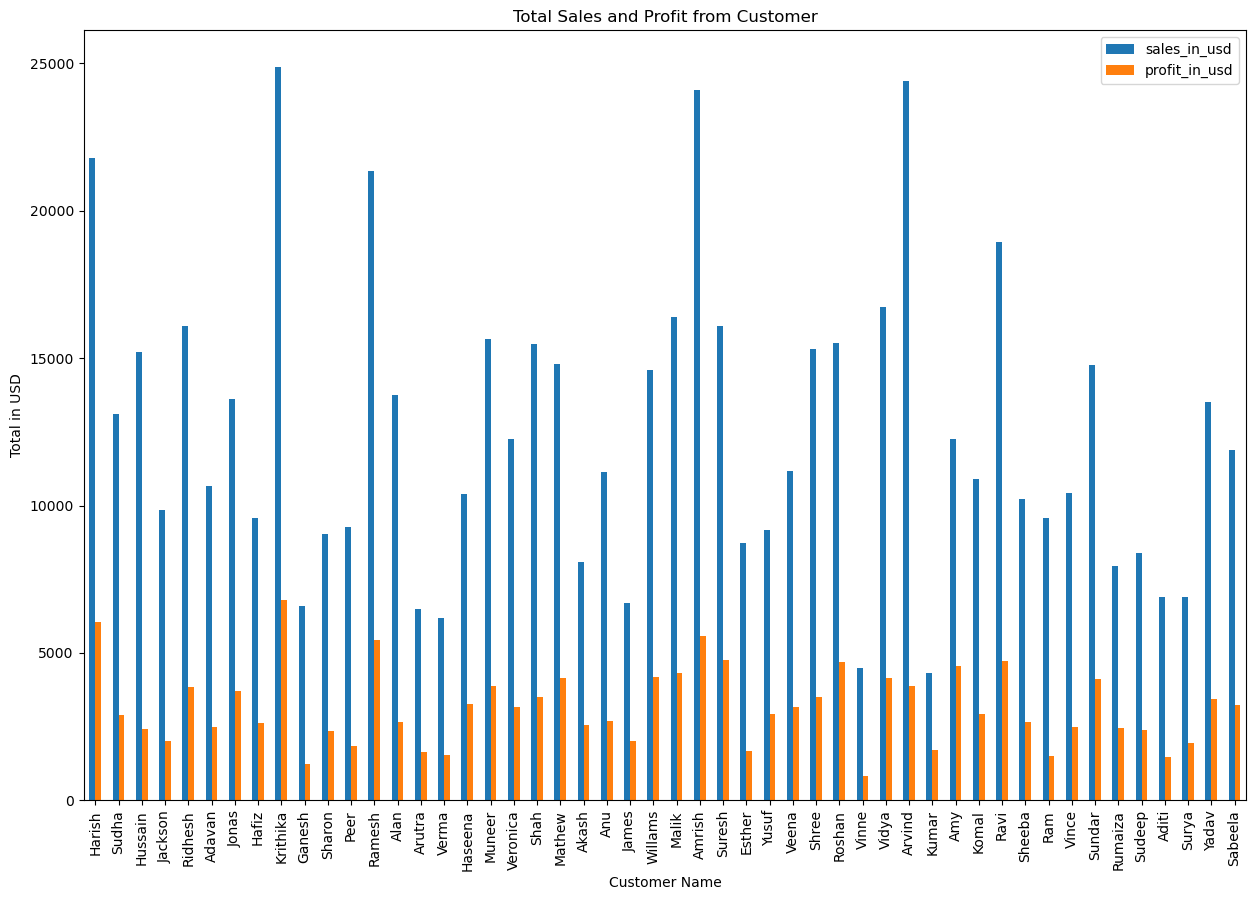

In [24]:
sales_by_customer = df2.groupby('customer_id', sort=False).sum()

sales_by_customer.plot(kind='bar', title='Total Sales and Profit from Customer',
               ylabel='Total in USD', xlabel='Customer Name', figsize=(15, 10))

Krithika is customer who has the highest both sales and profit in usd.

In [25]:
df2[df2.customer_id == 'Krithika']

,customer_id,category,sub_category,city,order_date,region,sales_in_usd,profit_in_usd,month_year
9,Krithika,Bakery,Cakes,Chennai,11/1/2022,West,1795.0,484.65,2022-11
25,Krithika,Snacks,Chocolates,Tirunelveli,10/6/2022,West,2022.0,202.20,2022-10
89,Krithika,Food Grains,Dals & Pulses,Madurai,8/3/2022,West,1878.0,450.72,2022-08
99,Krithika,Oil & Masala,Spices,Chennai,6/5/2022,Central,1475.0,531.00,2022-06
168,Krithika,Oil & Masala,Spices,Viluppuram,17/04/2022,Central,705.0,176.25,2022-04
179,Krithika,Food Grains,Atta & Flour,Karur,26/03/2022,East,1322.0,343.72,2022-03
186,Krithika,Bakery,Cakes,Cumbum,28/06/2022,West,2264.0,792.40,2022-06
271,Krithika,Snacks,Noodles,Tenkasi,27/01/2022,West,884.0,282.88,2022-01
274,Krithika,Fruits & Veggies,Organic Vegetables,Coimbatore,30/06/2022,West,1899.0,493.74,2022-06
330,Krithika,Snacks,Noodles,Karur,4/5/2022,East,2133.0,490.59,2022-04


From data, Krithika is someone who buy products in different city and region. From this data, we can analyze if each people could bought product from different city and region, not only with different order date.

<AxesSubplot:xlabel='category'>

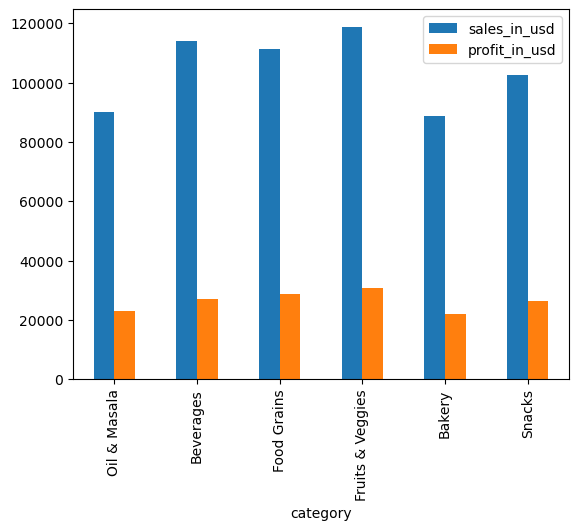

In [26]:
sales_by_category = df2.groupby('category', sort=False).sum()

sales_by_category.plot(kind='bar')

In [27]:
sales_by_category

,sales_in_usd,profit_in_usd
category,,
Oil & Masala,89998.0,22958.77
Beverages,114019.0,27178.39
Food Grains,111417.0,28830.27
Fruits & Veggies,118739.0,30781.96
Bakery,88827.0,21871.38
Snacks,102680.0,26314.72


<AxesSubplot:ylabel='None'>

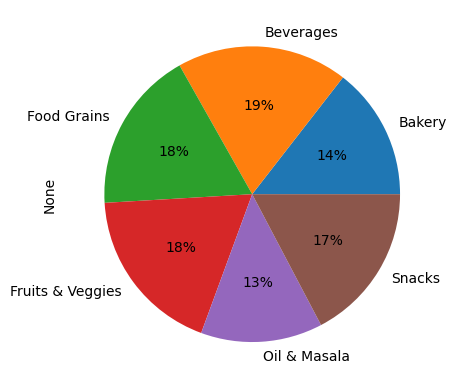

In [28]:
df2.groupby('category').size().plot(kind='pie', autopct='%.0f%%')

Fruits and Veggies is the highest category in both sales and profit but the highest sales occured in products with Beverage category.

<AxesSubplot:xlabel='sub_category'>

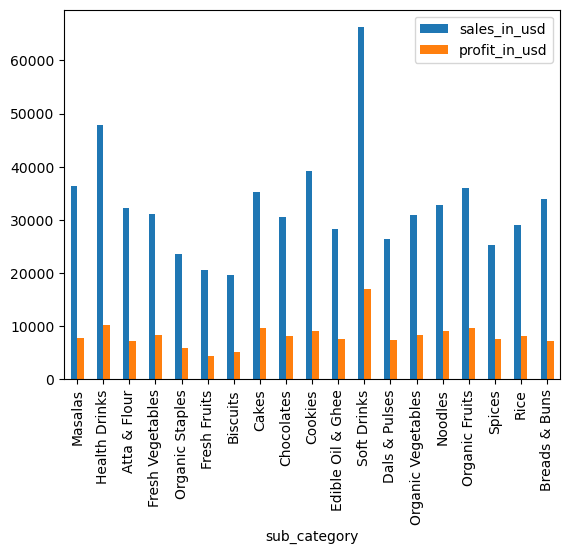

In [29]:
sales_by_subcategory = df2.groupby('sub_category', sort=False).sum()

sales_by_subcategory.plot(kind='bar')

In [30]:
sales_by_subcategory

,sales_in_usd,profit_in_usd
sub_category,,
Masalas,36470.0,7764.53
Health Drinks,47781.0,10219.11
Atta & Flour,32330.0,7277.85
Fresh Vegetables,31035.0,8371.63
Organic Staples,23616.0,5899.55
Fresh Fruits,20614.0,4411.72
Biscuits,19708.0,5092.27
Cakes,35247.0,9648.96
Chocolates,30587.0,8167.70


The highest sales and profit is from sub category Soft Drink. But from overall bar chart, we know that profit is under 50% from its sales price. It's same with sales and profit in category either. 

<AxesSubplot:xlabel='city'>

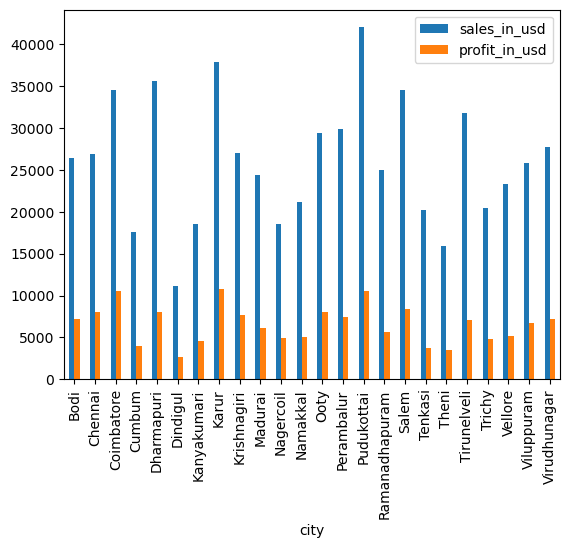

In [31]:
sales_by_city = df2.groupby('city').sum()

sales_by_city.plot(kind='bar')

In [32]:
sales_by_city

,sales_in_usd,profit_in_usd
city,,
Bodi,26463.0,7232.04
Chennai,26924.0,8037.03
Coimbatore,34535.0,10486.60
Cumbum,17546.0,4000.26
Dharmapuri,35660.0,8060.91
Dindigul,11160.0,2699.06
Kanyakumari,18560.0,4620.52
Karur,37891.0,10742.98
Krishnagiri,26967.0,7690.42


In [33]:
df2[df2.city == 'Pudukottai']

,customer_id,category,sub_category,city,order_date,region,sales_in_usd,profit_in_usd,month_year
48,Ridhesh,Snacks,Noodles,Pudukottai,31/01/2022,East,726.0,43.56,2022-01
67,Roshan,Fruits & Veggies,Fresh Vegetables,Pudukottai,10/6/2022,West,1160.0,510.40,2022-10
111,Arvind,Bakery,Breads & Buns,Pudukottai,3/3/2022,Central,2220.0,111.00,2022-03
151,Jackson,Snacks,Chocolates,Pudukottai,22/01/2022,West,1016.0,335.28,2022-01
154,Jonas,Snacks,Noodles,Pudukottai,25/02/2022,West,2236.0,626.08,2022-02
175,Shah,Fruits & Veggies,Organic Fruits,Pudukottai,10/2/2022,Central,1973.0,848.39,2022-10
187,Anu,Beverages,Soft Drinks,Pudukottai,24/04/2022,Central,813.0,138.21,2022-04
197,Verma,Food Grains,Organic Staples,Pudukottai,5/5/2022,East,914.0,338.18,2022-05
219,Arvind,Fruits & Veggies,Fresh Vegetables,Pudukottai,22/04/2022,East,2110.0,485.30,2022-04
252,Ramesh,Food Grains,Rice,Pudukottai,21/03/2022,East,1769.0,636.84,2022-03


The highest sales and profit are from Pudukottai city. But there is something dizzy because Pudukottai could from different region in each data rows. As we know, city is definitely from one region and one region consists many city except when there are many city have actually same name. 

Let's analyze sales profit based on region.

,sales_in_usd,profit_in_usd
region,,
North,1254.0,401.28
South,68889.0,18429.94
West,195694.0,50367.98
Central,157405.0,39699.43
East,202438.0,49036.86


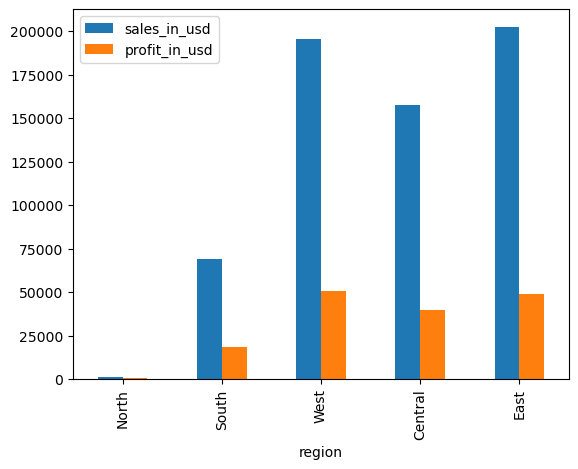

In [34]:
sales_by_region = df2.groupby('region', sort=False).sum()

sales_by_region.plot(kind='bar')

sales_by_region

<AxesSubplot:ylabel='None'>

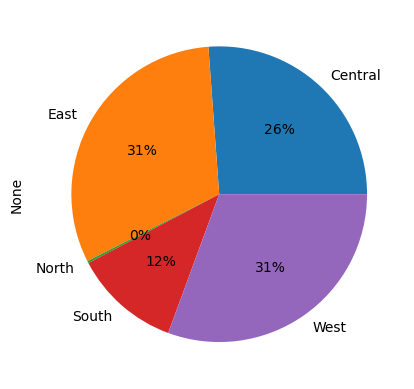

In [35]:
df2.groupby('region').size().plot(kind='pie', autopct='%.0f%%')

The highest sales price is come from East region. But the highest profit price is come from West region. Region composision between West and East in dataset is totally same.

In [36]:
df2[df2.region == 'East']

,customer_id,category,sub_category,city,order_date,region,sales_in_usd,profit_in_usd,month_year
23,Alan,Fruits & Veggies,Organic Vegetables,Tenkasi,26/01/2022,East,969.0,77.52,2022-01
27,Jackson,Bakery,Biscuits,Viluppuram,19/01/2022,East,979.0,401.39,2022-01
28,Veronica,Beverages,Soft Drinks,Krishnagiri,13/03/2022,East,1988.0,874.72,2022-03
29,Shah,Oil & Masala,Masalas,Kanyakumari,24/01/2022,East,989.0,69.23,2022-01
30,Ramesh,Beverages,Soft Drinks,Dharmapuri,15/01/2022,East,1845.0,166.05,2022-01
...,...,...,...,...,...,...,...,...,...
480,Ravi,Snacks,Chocolates,Krishnagiri,5/1/2022,East,1224.0,403.92,2022-05
482,James,Bakery,Cakes,Dharmapuri,14/01/2022,East,673.0,195.17,2022-01
483,Sudha,Food Grains,Atta & Flour,Virudhunagar,14/06/2022,East,2092.0,188.28,2022-06
491,Yadav,Beverages,Soft Drinks,Tenkasi,3/4/2022,East,531.0,74.34,2022-03


,sales_in_usd,profit_in_usd
month_year,,
2022-01,71942.0,17551.92
2022-02,84395.0,21538.25
2022-03,93597.0,22416.07
2022-04,66371.0,14916.21
2022-05,80348.0,19525.93
2022-06,90312.0,24954.20
2022-07,19021.0,4873.99
2022-08,14851.0,3921.05
2022-09,25652.0,6436.70


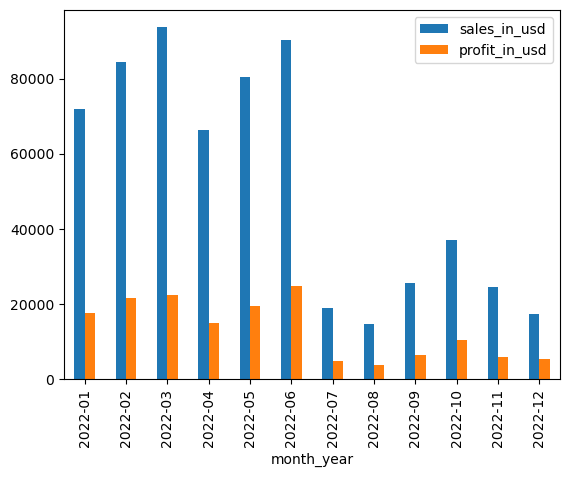

In [37]:
sales_by_month = df2.groupby('month_year').sum()

sales_by_month.plot(kind='bar')

sales_by_month

<AxesSubplot:ylabel='None'>

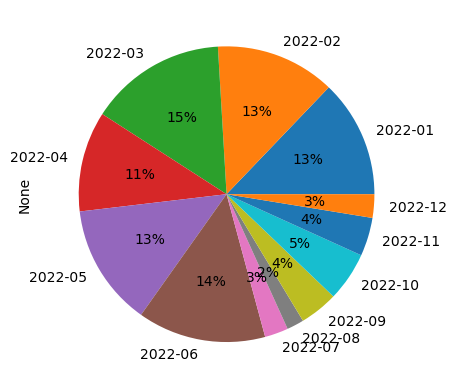

In [38]:
df2.groupby('month_year').size().plot(kind='pie', autopct='%.0f%%')

The highest sales occured in March 2022 but the highest profit occured in June 2022. The lowest sales and profit occured in August 2022. This is directly proportional with when the most sales occured in overall dataset. 

In [39]:
df2.to_csv("grocery sales.csv", index=False)